In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.colors import ListedColormap 
%matplotlib inline

In [4]:
data=pd.read_csv("C:\\Users\\channu\\Downloads\\Zoo.csv")

In [5]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


array([[<AxesSubplot:xlabel='hair', ylabel='hair'>,
        <AxesSubplot:xlabel='feathers', ylabel='hair'>,
        <AxesSubplot:xlabel='eggs', ylabel='hair'>,
        <AxesSubplot:xlabel='milk', ylabel='hair'>,
        <AxesSubplot:xlabel='airborne', ylabel='hair'>,
        <AxesSubplot:xlabel='aquatic', ylabel='hair'>],
       [<AxesSubplot:xlabel='hair', ylabel='feathers'>,
        <AxesSubplot:xlabel='feathers', ylabel='feathers'>,
        <AxesSubplot:xlabel='eggs', ylabel='feathers'>,
        <AxesSubplot:xlabel='milk', ylabel='feathers'>,
        <AxesSubplot:xlabel='airborne', ylabel='feathers'>,
        <AxesSubplot:xlabel='aquatic', ylabel='feathers'>],
       [<AxesSubplot:xlabel='hair', ylabel='eggs'>,
        <AxesSubplot:xlabel='feathers', ylabel='eggs'>,
        <AxesSubplot:xlabel='eggs', ylabel='eggs'>,
        <AxesSubplot:xlabel='milk', ylabel='eggs'>,
        <AxesSubplot:xlabel='airborne', ylabel='eggs'>,
        <AxesSubplot:xlabel='aquatic', ylabel='eggs'>],
    

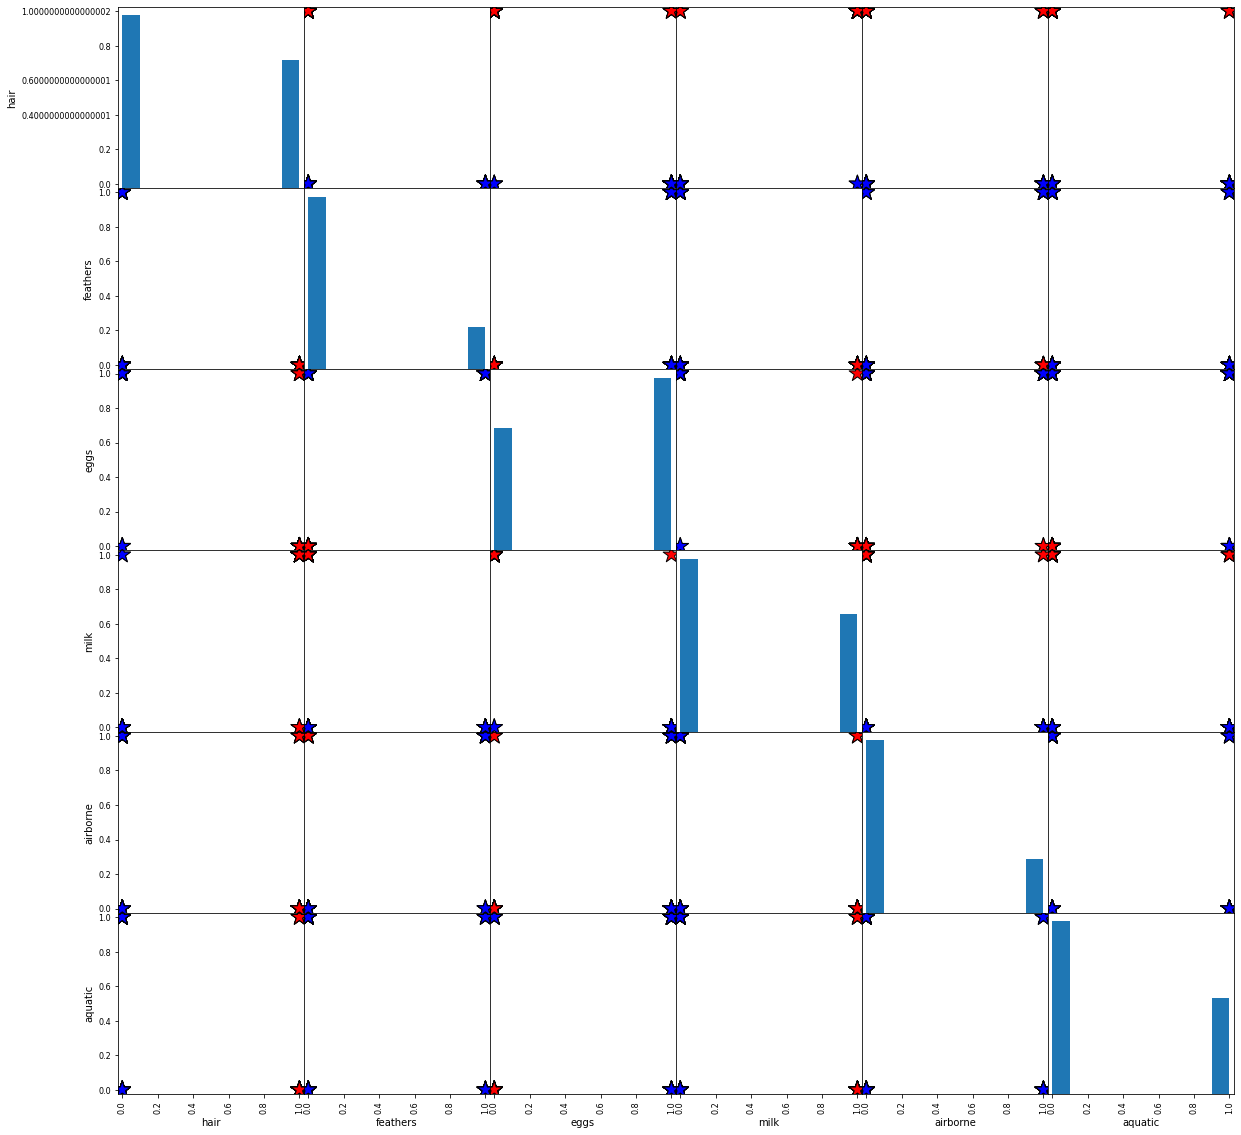

In [9]:
color_list = [("red" if i ==1 else "blue" if i ==0 else "yellow" ) for i in data.hair]
unique_list = list(set(color_list))
unique_list
pd.plotting.scatter_matrix(data.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '*',
                                       edgecolor= "black")

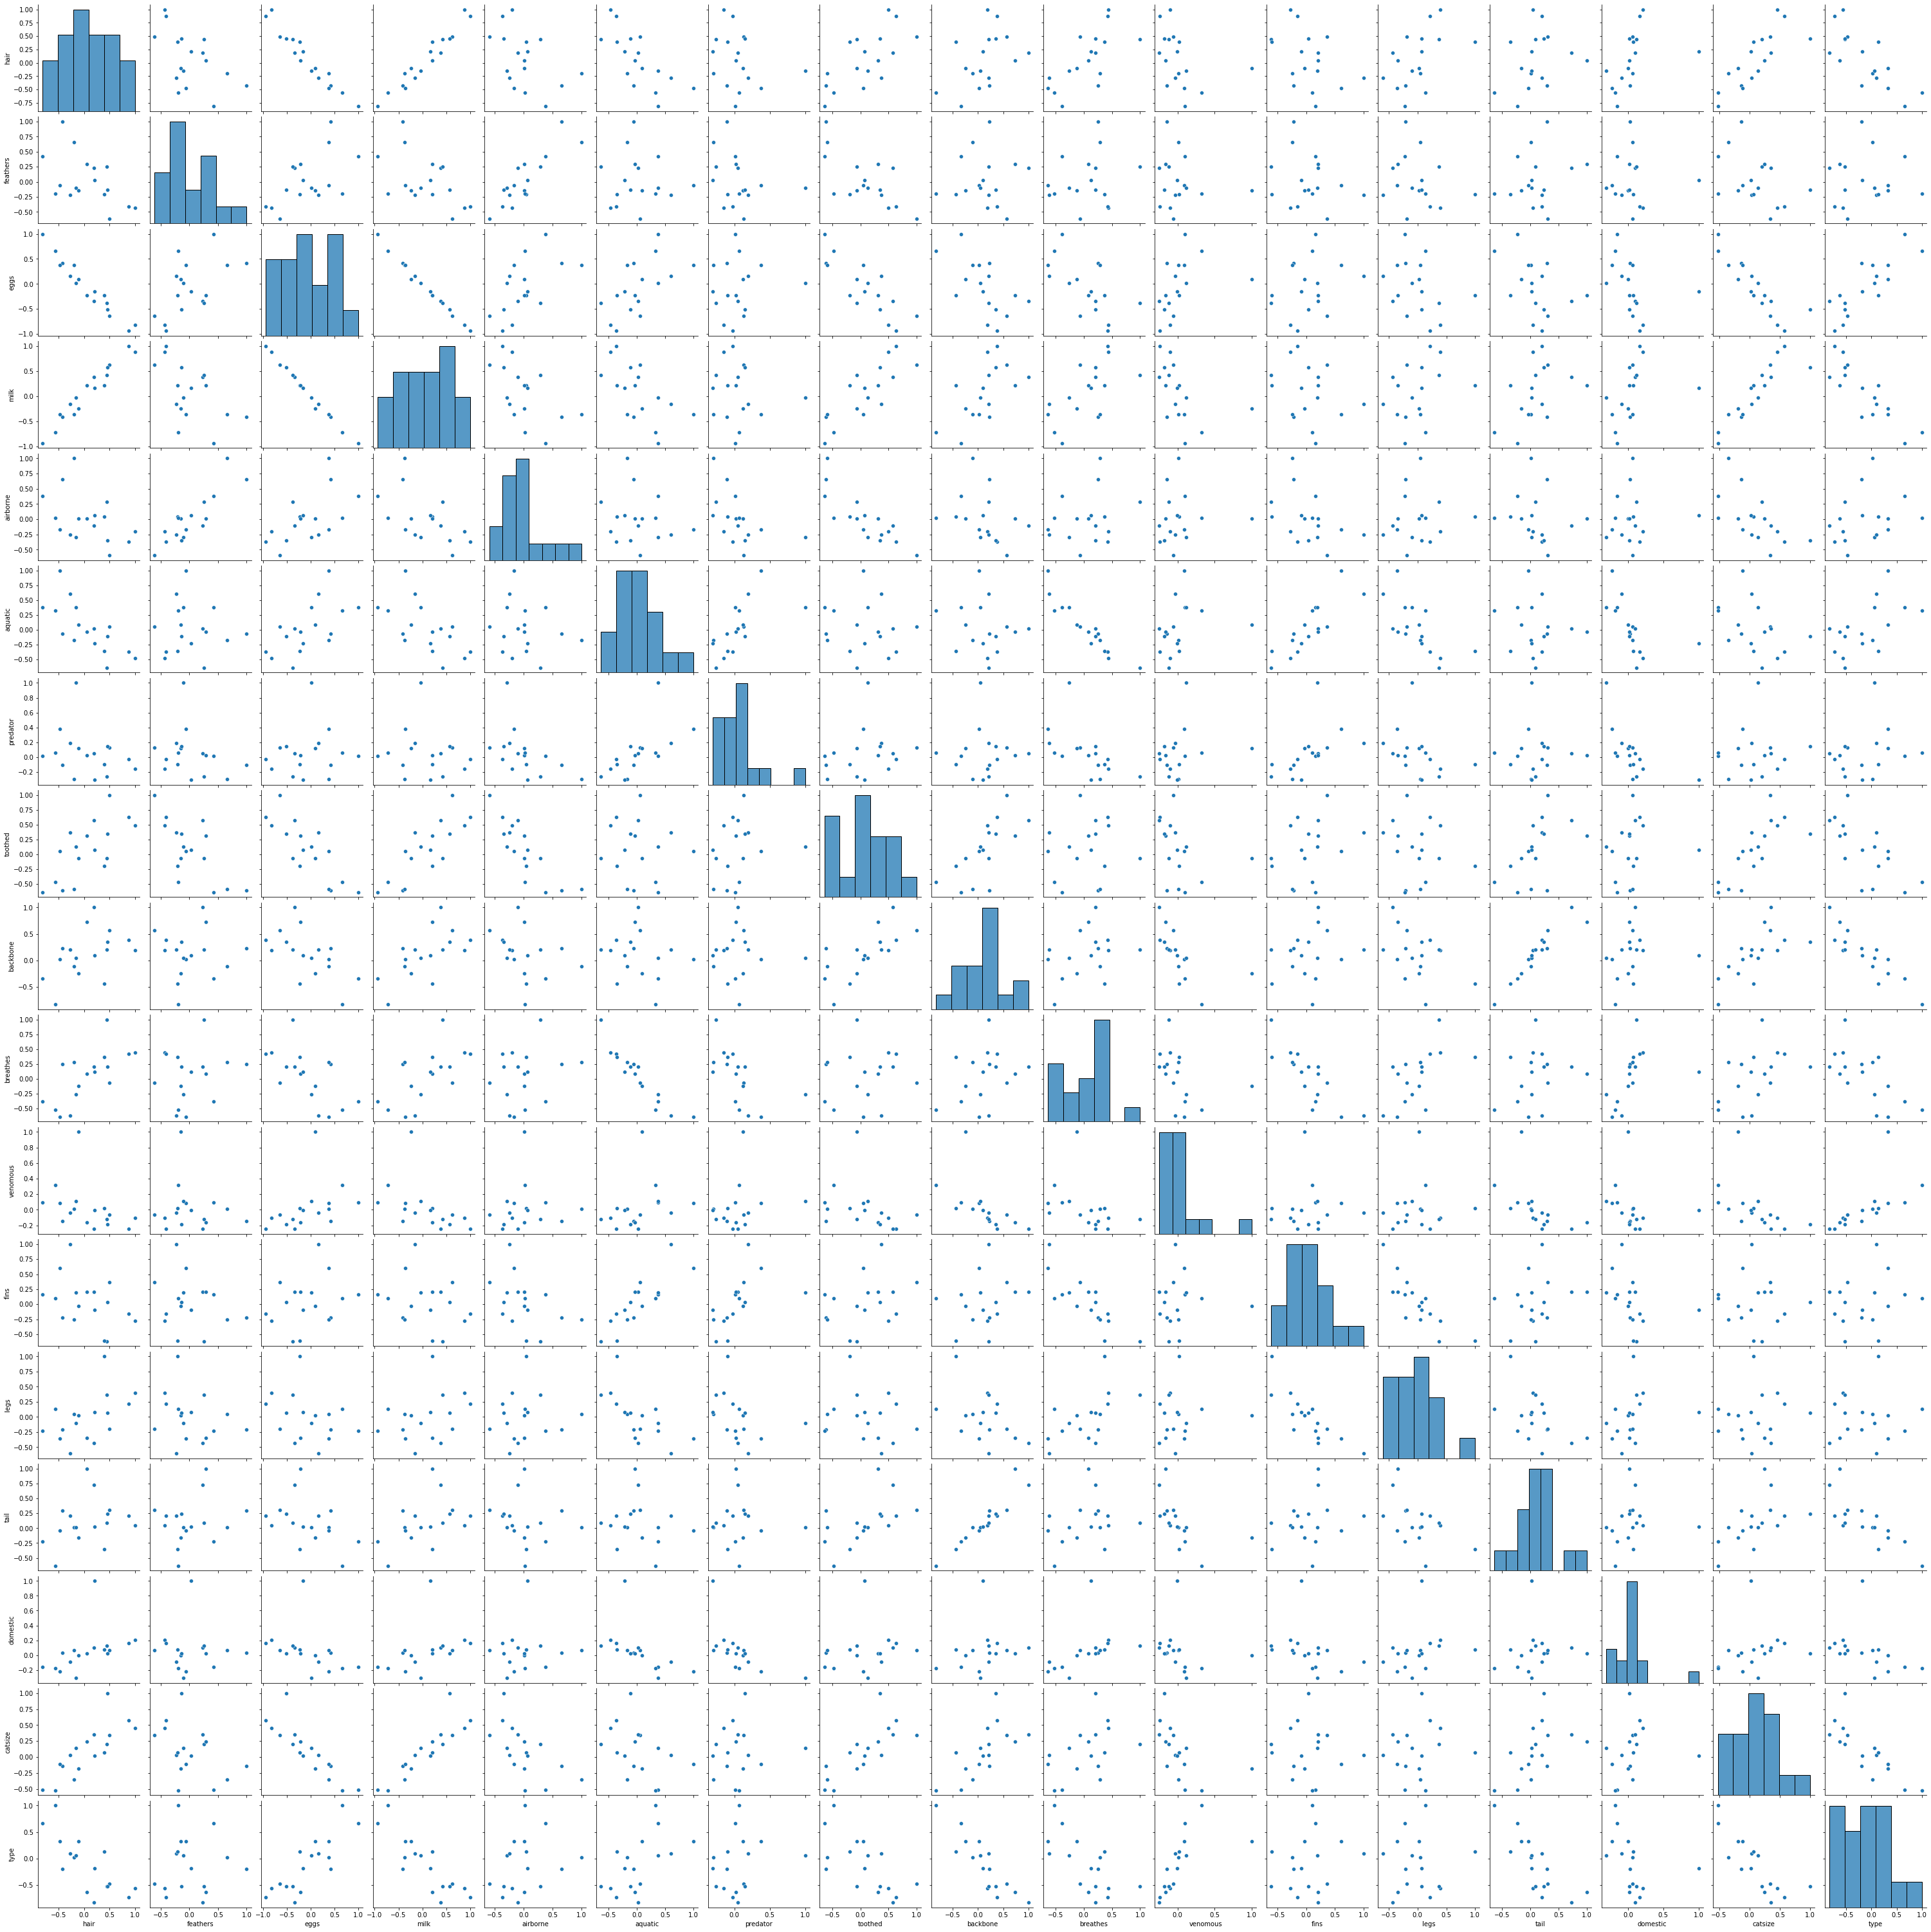

In [11]:
sns.pairplot(data.corr())

In [12]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [13]:
duplicates=data.duplicated()
duplicates[duplicates>1]

Series([], dtype: bool)

# train test spilt

In [16]:
from sklearn.model_selection import train_test_split

In [19]:
X = data.iloc[:,1:17]
y = data.iloc[:,17]
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=1,stratify=y)

# TRAINING AND TESTING DATA

#  DECISION TREE

In [23]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [24]:
clf=DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
y_pred_DecisionTreeClassifier=clf.predict(x_test)

In [31]:
scores = []
score = accuracy_score(y_pred_DecisionTreeClassifier,y_test)
a=scores.append(score)

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
score_tree=cross_val_score(clf, X,y, cv=10)
score_tree

C:\Users\channu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([1. , 1. , 1. , 1. , 0.9, 0.9, 0.8, 1. , 1. , 1. ])

In [34]:
cv_scores = []
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2))
cv_score = score_tree.mean()
cv_scores.append(cv_score)

Decision Tree Accuracy: 0.96 (+/- 0.13)


# random forest classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
clf=RandomForestClassifier(random_state=0,n_estimators=25,n_jobs=2)

In [39]:
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=0)

In [40]:
y_pred_RandomForestClassifier=clf.predict(x_test)

In [41]:
score=accuracy_score(y_pred_RandomForestClassifier,y_test)

In [43]:
scores.append(score)

In [44]:
importances = []
importances = clf.feature_importances_


In [45]:
f_importances = pd.Series(importances, X.columns)


In [46]:
f_importances.sort_values(ascending=False, inplace=True)

<AxesSubplot:>

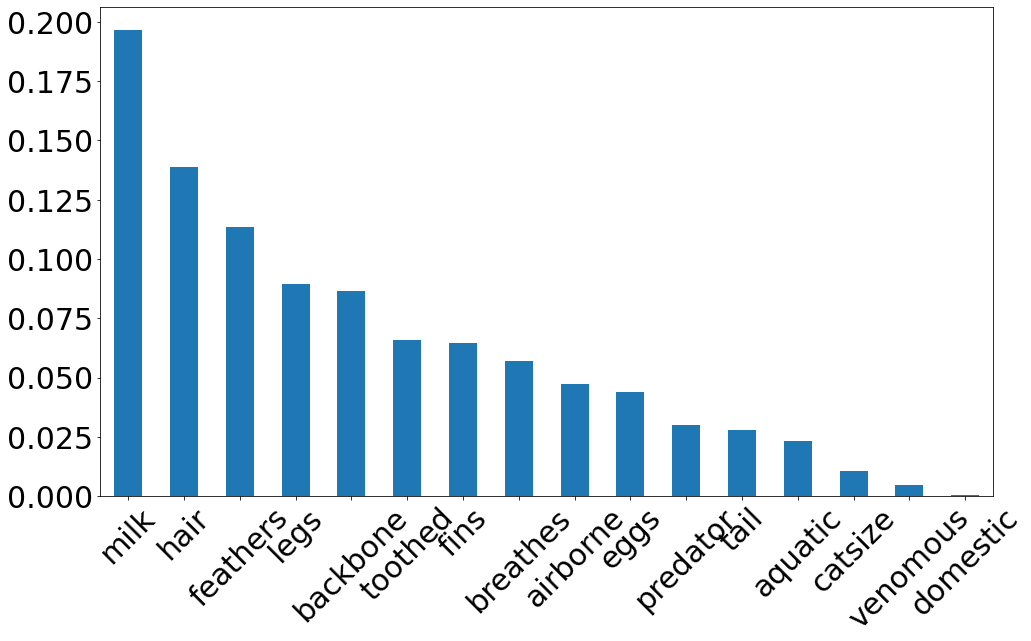

In [47]:
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

In [48]:
score_forest=cross_val_score(clf, X,y, cv=10)
score_forest

C:\Users\channu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([1. , 1. , 1. , 1. , 0.9, 0.9, 0.9, 1. , 1. , 1. ])

In [49]:
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (score_forest.mean(), score_forest.std() * 2))
cv_score = score_forest.mean()
cv_scores.append(cv_score)

Random Forest Accuracy: 0.97 (+/- 0.09)


# perceptron

In [63]:
from sklearn.linear_model import Perceptron

In [64]:
clf=Perceptron(tol=1e-3, eta0=0.1, random_state=0)

In [65]:
clf.fit(x_train,y_train)

Perceptron(eta0=0.1)

In [68]:
y_pred_Perceptron=clf.predict(x_test)

In [69]:
score = accuracy_score(y_pred_Perceptron,y_test)
scores.append(score)

In [71]:
score_perceptron=cross_val_score(clf,X,y,cv=10)
score_perceptron

C:\Users\channu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([1. , 1. , 0.9, 1. , 0.9, 0.9, 0.9, 0.9, 0.9, 0.9])

In [72]:
print("Perceptron Accuracy: %0.2f (+/- %0.2f)" % (score_perceptron.mean(), score_perceptron.std() * 2))
cv_score = score_perceptron.mean()
cv_scores.append(cv_score)

Perceptron Accuracy: 0.93 (+/- 0.09)


# SUPPORT VECTOR MACHINE

In [74]:
from sklearn.svm import SVC

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
svm = SVC(kernel='linear', C=0.2, random_state=0)

In [77]:
svm.fit(x_train,y_train)

SVC(C=0.2, kernel='linear', random_state=0)

In [79]:
y_pred_svm = svm.predict(x_test)

In [82]:
score = accuracy_score(y_pred_svm,y_test)
scores.append(score)

In [83]:
score_svm=cross_val_score(svm, X,y, cv=10)
print("Support Vector Machine Accuracy: %0.2f (+/- %0.2f)" % (score_svm.mean(), score_svm.std() * 2))
cv_score = score_svm.mean()
cv_scores.append(cv_score)

Support Vector Machine Accuracy: 0.96 (+/- 0.10)


C:\Users\channu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


# k nearest neighbour

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
clf=KNeighborsClassifier(n_neighbors=5)

In [92]:
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [93]:
y_pred_KNeighborsClassifier=clf.predict(x_test)

In [94]:
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [95]:
score_knn=cross_val_score(clf, X,y, cv=10)

C:\Users\channu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [96]:
print(" K-Nearest Neighbors Accuracy: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))
cv_score = score_knn.mean()
cv_scores.append(cv_score)

 K-Nearest Neighbors Accuracy: 0.88 (+/- 0.12)


# accuracy score

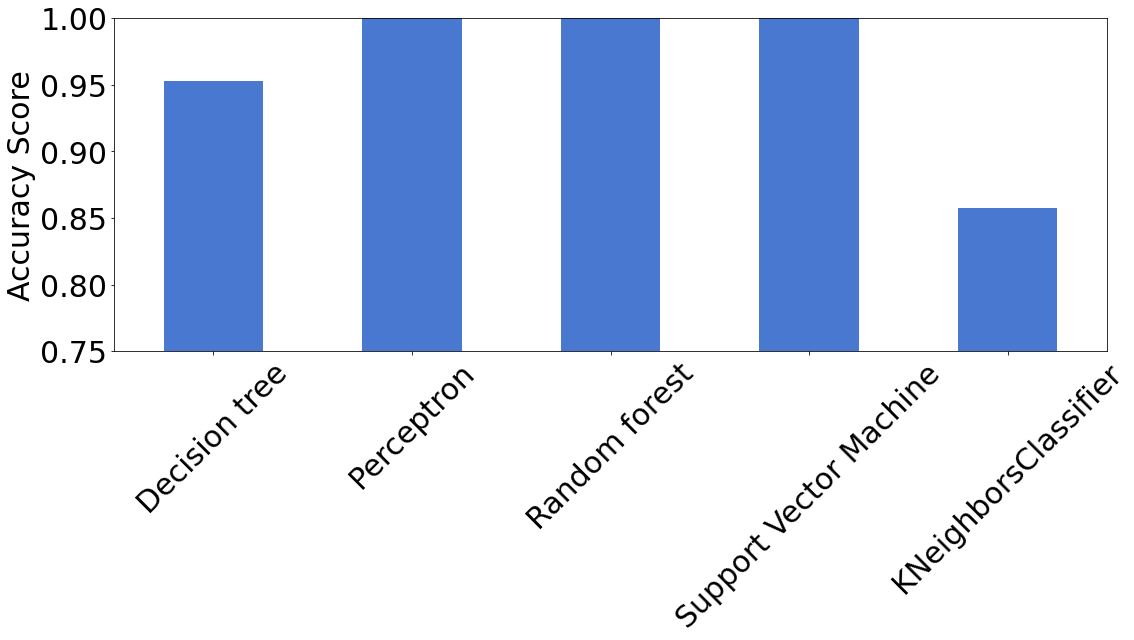

In [97]:
# Convert the Accuracy Scores into one-dimensional 1darray with corresponding classifier names as axis labels

Acc_scores = pd.Series(scores, ['Decision tree','Perceptron', 'Random forest','Support Vector Machine',
                                  'KNeighborsClassifier'])

current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
colors = np.random.randint(0,5,5)

# Make the bar Plot from f_importances 
Acc_scores.plot(x='Classifiers', y='Accuracy scores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Accuracy Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()

# Cross Validation Score¶

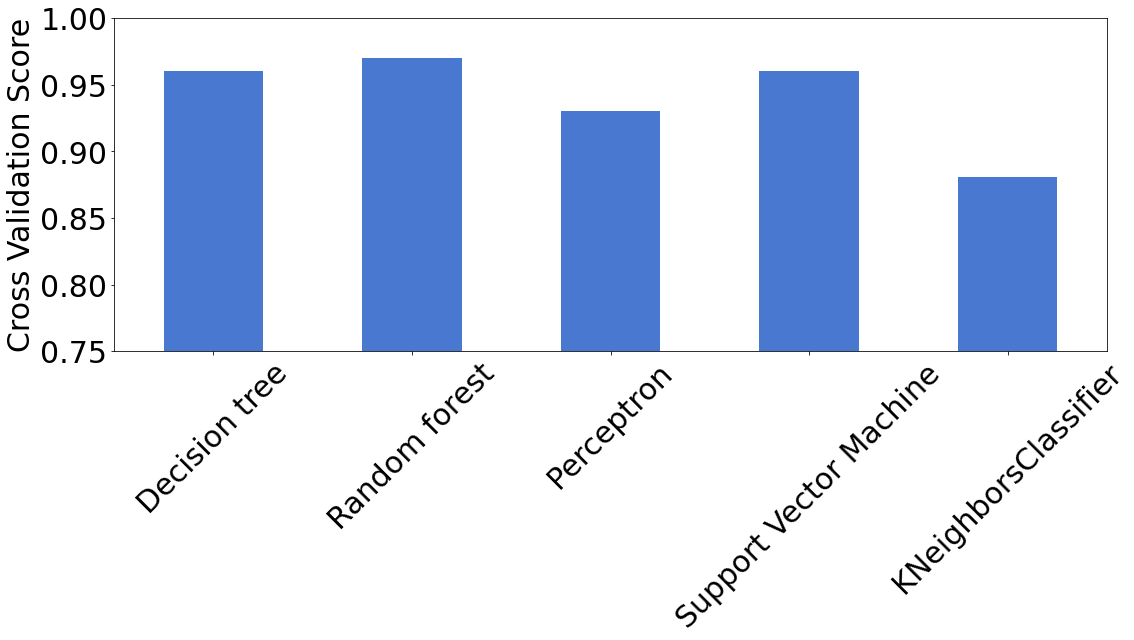

In [98]:
# Convert the Cross Validation scores into one-dimensional 1darray with corresponding classifier names as axis labels

clf_scores = pd.Series(cv_scores, ['Decision tree', 'Random forest','Perceptron','Support Vector Machine',
                                  'KNeighborsClassifier'])

current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
#colors = np.random.randint(0,5,5)

# Make the bar Plot from f_importances 
clf_scores.plot(x='Classifiers', y='Cross Validation scores',kind = 'bar',figsize=(16,9), 
                rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Cross Validation Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()

conclusion:- As i got K-Nearest Neighbors Accuracy:0.14 accuracy score and 0.89 of cross validation.
wins with a 1.0 accuracy score and 0.96 of cross validation.